In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('_DATA/currency/GBPUSD_2019.12.17-2021.12.17.csv')
# add column for close price on previous day
dataset['Close-Previous-Day'] = dataset['Close'].shift(1)
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close-Previous-Day
1,2019-12-18,1.312215,1.312560,1.306233,1.312215,1.312215,0,1.327246
2,2019-12-19,1.308472,1.312956,1.299663,1.308729,1.308729,0,1.312215
3,2019-12-20,1.301643,1.307839,1.300830,1.301744,1.301744,0,1.308729
4,2019-12-23,1.300525,1.303254,1.290706,1.300542,1.300542,0,1.301744
5,2019-12-24,1.294448,1.296950,1.292307,1.294498,1.294498,0,1.300542


In [2]:
# data preprocessing
X = dataset[['Open', 'Close-Previous-Day']].values
y = dataset['Close'].values

In [3]:
# split data to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0, shuffle = False)

print("Train size =", len(y_train))
print("Test size =", len(y_test))

Train size = 350
Test size = 173


In [4]:
import time
start_time_ms = time.time() * 1000

# Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)

end_time_ms = time.time() * 1000
print("Prediction completed. Time spent = %.3f seconds" % ((end_time_ms - start_time_ms) / 1000))

Prediction completed. Time spent = 0.050 seconds


In [5]:
# diplay stats 
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
#print("y_test", y_test)
#print("y_pred", y_pred)
print('Coefficients: \n', regressor.coef_)
print('Intercepts:', regressor.intercept_)    # the intercept (often labeled the constant) 
                                                 # is the expected mean value of Y when all X=0
print('Score of the model: %.6f' % regressor.score(X_test, y_test))
print('R^2 score: %.6f' % r2_score(y_test, y_pred))
print("RMSE (root mean square error): %.6f" % sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: 
 [0.99817362 0.00124457]
Intercepts: 0.0008045681004320571
Score of the model: 0.999827
R^2 score: 0.999827
RMSE (root mean square error): 0.000332


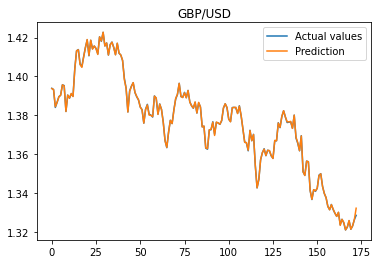

In [6]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual values', 'Prediction'])
plt.title("GBP/USD")
plt.show()